# SEAS 6414 - Python Applications in Data Analytics
## Homework 3

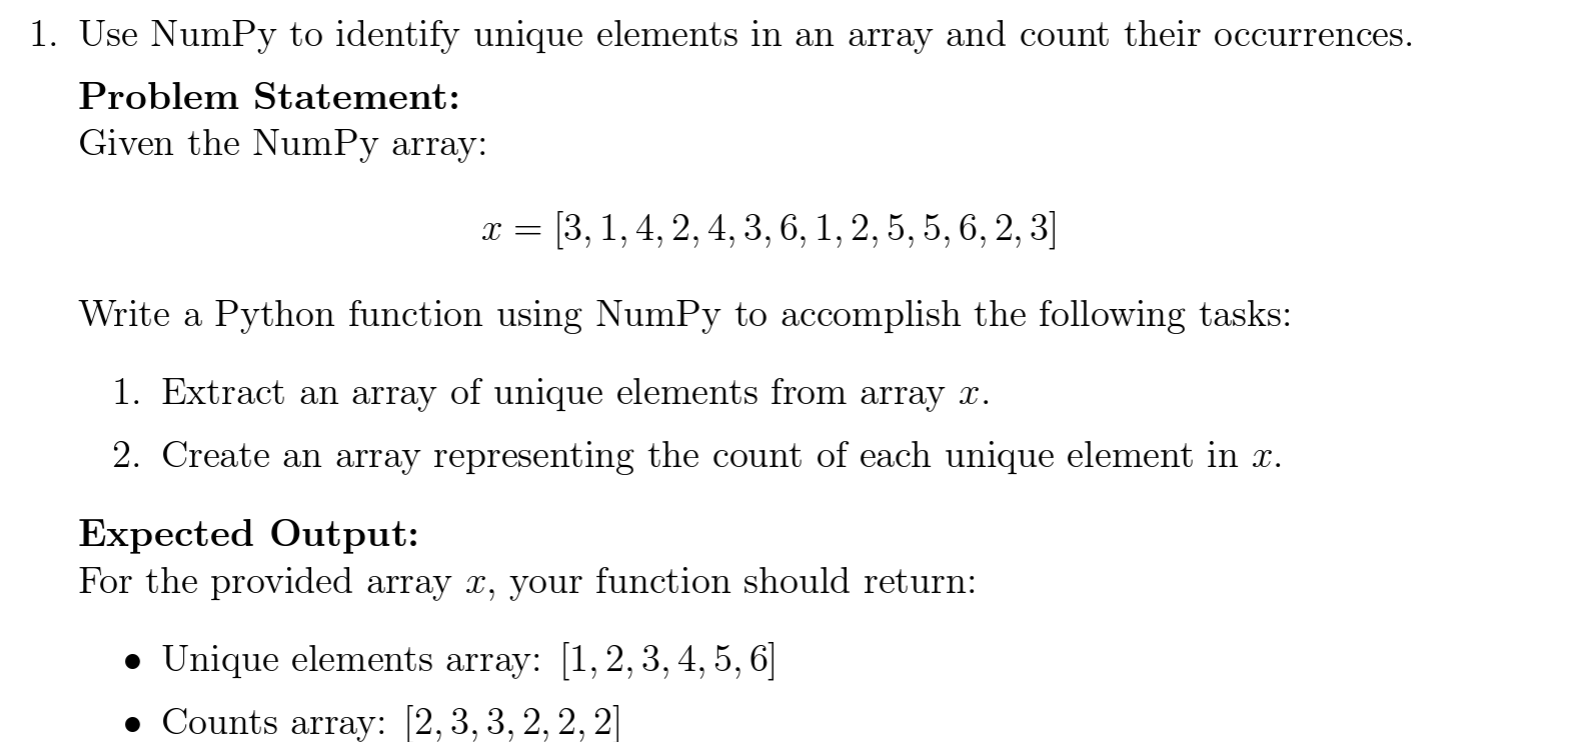

In [76]:
import numpy as np

all_x = np.array([3,1,4,2,4,3,6,1,2,5,5,6,2,3])

# This numpy function extracts all unique elements in the array
unique_x = np.unique(all_x)
print("unique elements in array: ",unique_x)

unique elements in array:  [1 2 3 4 5 6]


In [77]:
# Method 1, not so fancy, using the return_counts parameter in np.unique

unique_x_counts = np.unique(all_x,return_counts=True)
print("Unique counts ",unique_x_counts[1])

Unique counts  [2 3 3 2 2 2]


In [79]:
# Method 2, fancy way using a lambda function and using map to apply it to the array

count_map = map(lambda x: np.sum(all_x == x), unique_x)

# Convert the map object to a NumPy array
counts = np.fromiter(count_map, dtype=int)
    

print("Unique counts ",counts)


Unique counts  [2 3 3 2 2 2]


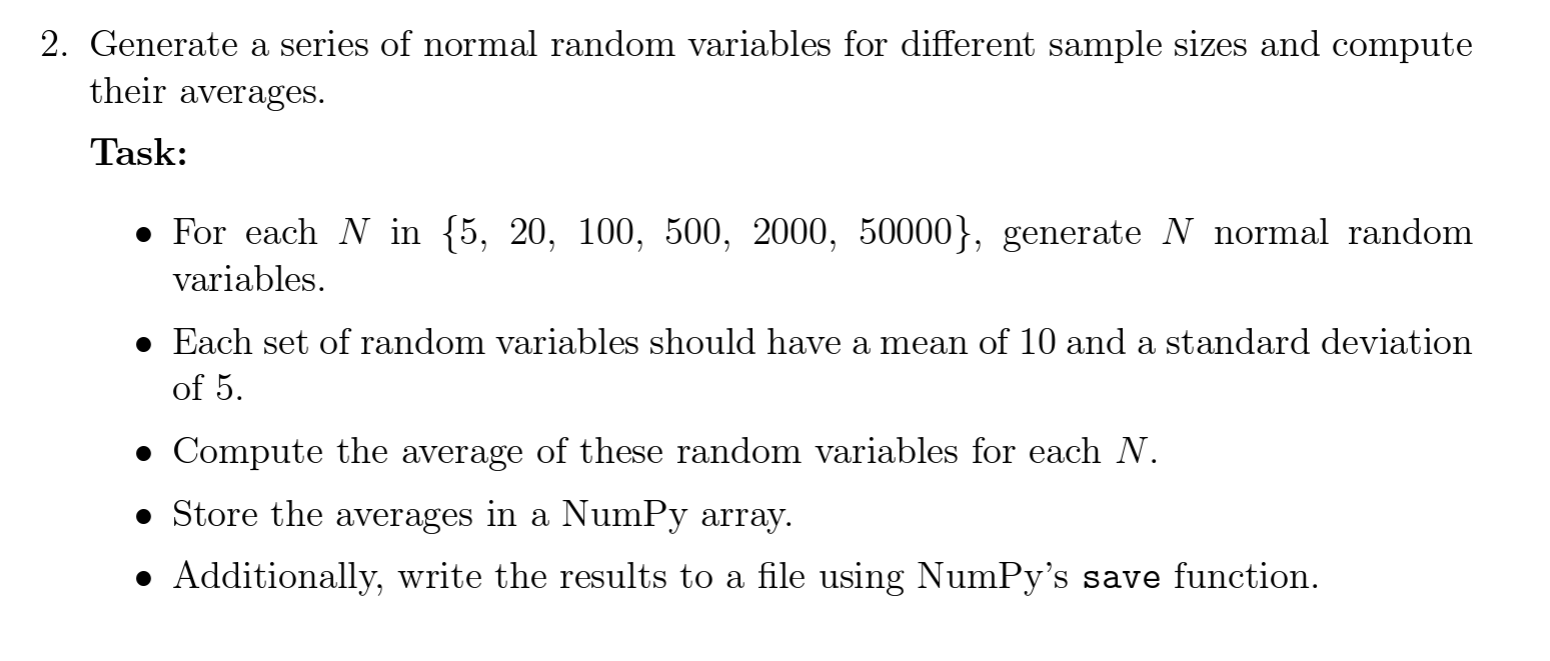
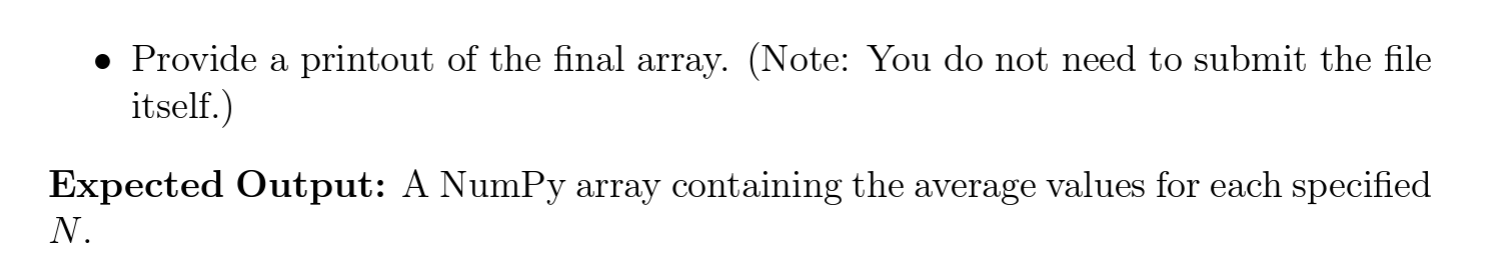

In [9]:
N = np.array([5, 20, 100, 500, 2000, 50000])
N

array([    5,    20,   100,   500,  2000, 50000])

In [80]:
# Again I went fancy and use a lambda function and map to apply to all values of the array N
averages_map =  map(lambda x: np.mean(np.random.normal(10,5,x)), N)

# Convert the map object to a NumPy array
results = np.fromiter(averages_map, dtype=float)
    

print(results)


[ 8.17119048 10.31649786  9.90409159 10.00305195  9.90076214 10.00548361]


In [81]:
# Save the array to a file
np.save('my_array.npy', results)

loaded_array = np.load('my_array.npy')

print(loaded_array)

[ 8.17119048 10.31649786  9.90409159 10.00305195  9.90076214 10.00548361]


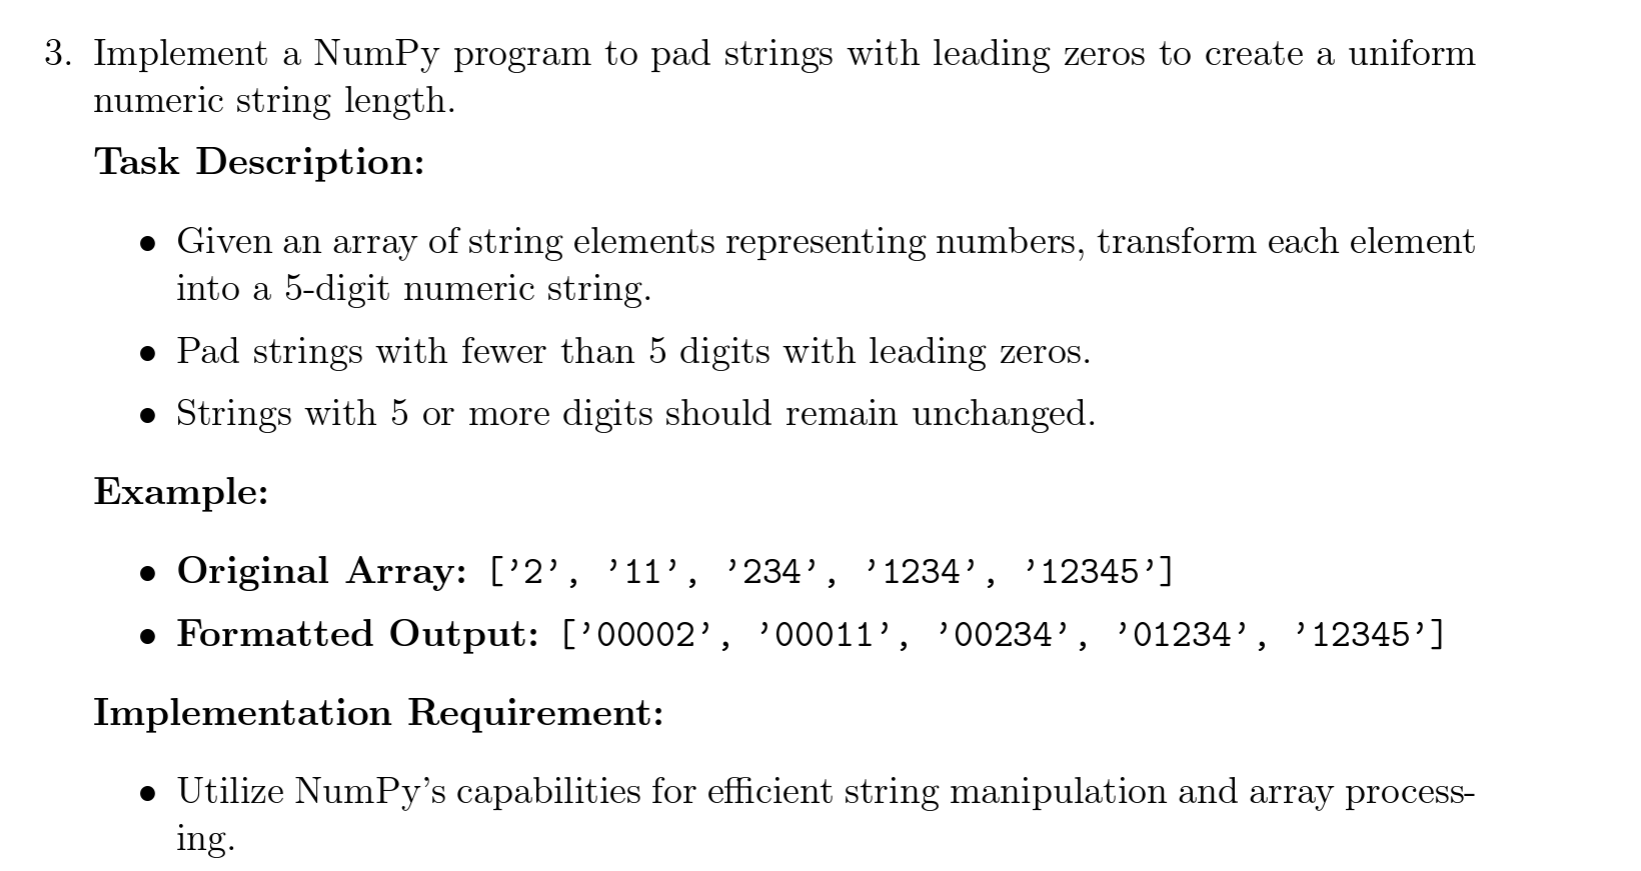

In [82]:
# Easy one, since numpy does have a padd with zeros function

original_array = ['2', '11', '234','1234', '12345']
padded_array = np.char.zfill(original_array, 5)
padded_array

array(['00002', '00011', '00234', '01234', '12345'], dtype='<U5')

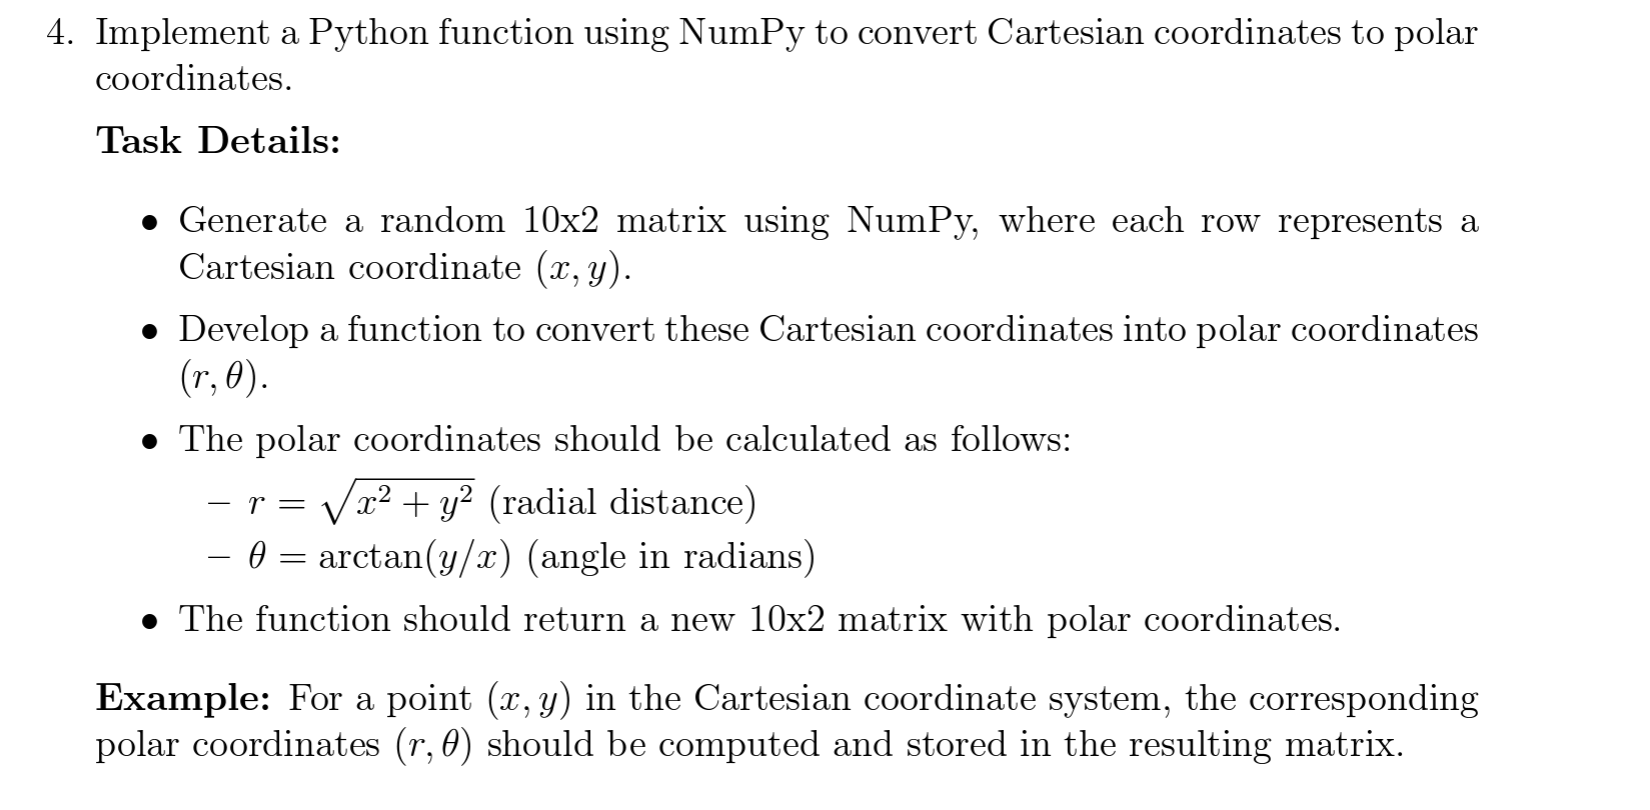

In [83]:
# Let's generate a 10x2 array of random numbers. Between 0 and 1. If we want differente ranges, we could just multiply
# the array by the MAX number and substract
coordinates = np.random.rand(10, 2)

# I decided to do it between 0 and 100
coordinates = coordinates * 100  #To set them from 0 to 100

# Lets define a function which take the TUPLE and calculates/returns the two values we need
func = lambda x: [np.sqrt(x[0]**2+x[1]**2), np.arctan(x[1]/x[0])]

# Use map to apply the function to each row
mapped = map(func, coordinates)

# Convert the map object to a list and then to a NumPy array
results = np.array(list(mapped))

print('Cartesian')
print(coordinates)
print('Polar')
print(results)

Cartesian
[[25.33037881 21.61731646]
 [22.4132038  89.81253035]
 [78.58745429  5.84192379]
 [24.10259365 44.04538151]
 [42.89600708 67.25207546]
 [27.44421977 24.75881337]
 [39.52291019 92.17460632]
 [18.19179186 62.00600927]
 [21.24926649 38.36215387]
 [53.94887096 87.03175502]]
Polar
[[3.33006976e+01 7.06473109e-01]
 [9.25669612e+01 1.32623613e+00]
 [7.88042895e+01 7.42001213e-02]
 [5.02088703e+01 1.07008858e+00]
 [7.97678449e+01 1.00301759e+00]
 [3.69619269e+01 7.34001889e-01]
 [1.00290670e+02 1.16572576e+00]
 [6.46195518e+01 1.28541698e+00]
 [4.38541466e+01 1.06495444e+00]
 [1.02396323e+02 1.01589038e+00]]


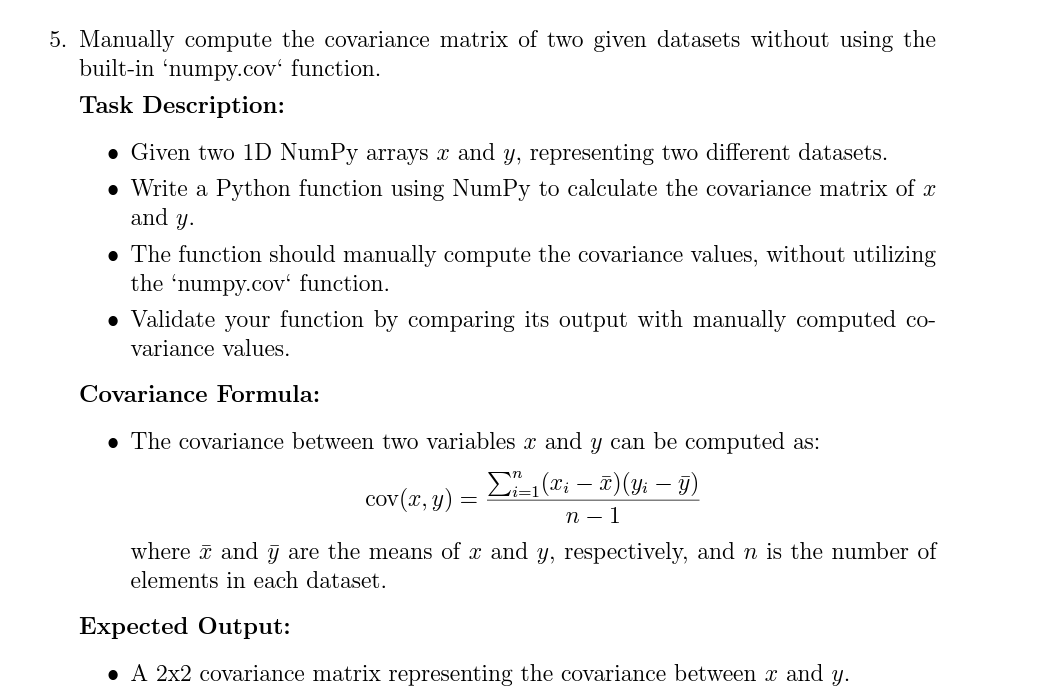

In [84]:
# My method would work for a matrix of any size!

# One larger for testing
A = np.array([[ 2,  3, -1],
       [ 3, -2, -5],
       [ 1,  2,  3],
       [ 2, -7, -1],
       [-4, -5,  1],
       [ 4, -2, 13],
       [-1,  2, -8],
       [11, -1,  2]])

# A 2x2 for this HW
B = np.array([[2,3],
             [-1,4]])

In [86]:
# First let's do it with the 2,2

# We center the matrix by substracting the mean
MeanVector = np.mean(B,axis=0)
B_centered = B - MeanVector
rows = B.shape[0]

# We make use of a formula which says that covariance matrix is equal to B transposed dot B divided by the # of rows
CovarianceM = B_centered.T.dot(B_centered)/rows
CovarianceM

array([[ 2.25, -0.75],
       [-0.75,  0.25]])

In [88]:
# Lets check it!
np.cov(B, rowvar=False,bias=True)

array([[ 2.25, -0.75],
       [-0.75,  0.25]])

In [90]:
# Now let's test it with a larger matrix

MeanVector = np.mean(A,axis=0)
A_centered = A - MeanVector
rows = A.shape[0]
CovarianceM = A_centered.T.dot(A_centered)/rows
CovarianceM

array([[16.4375,  1.1875,  6.625 ],
       [ 1.1875, 10.9375, -3.    ],
       [ 6.625 , -3.    , 34.    ]])

In [91]:
np.cov(A, rowvar=False,bias=True)

array([[16.4375,  1.1875,  6.625 ],
       [ 1.1875, 10.9375, -3.    ],
       [ 6.625 , -3.    , 34.    ]])

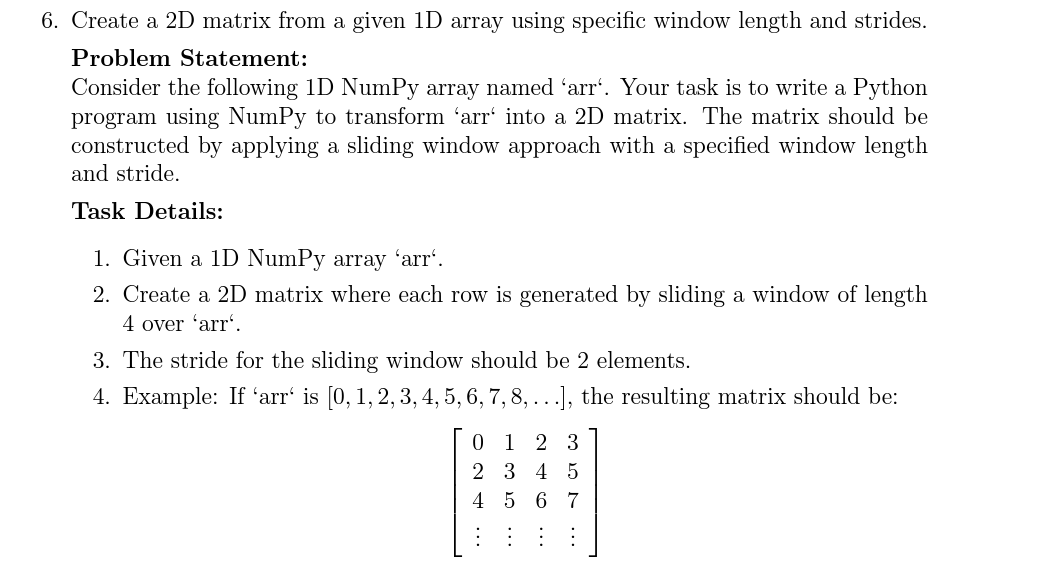
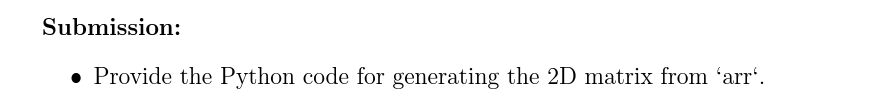

In [92]:
arr = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
window_length = 4
stride = 2
len_arr = len(arr)

# Here I calculate whow many rows will the new matrix have
num_rows = ((len_arr - window_length) // stride) +1


rows = []

# we will loop every for the number of rows in the new matrix 
for i in range(0, num_rows * stride, stride):
        rows.append(arr[i:i+window_length])  # Here we append  a list of numbers from the starting point of the stride

# We convert the list of list to numpy array
new_arr = np.array(rows)


In [93]:
new_arr

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

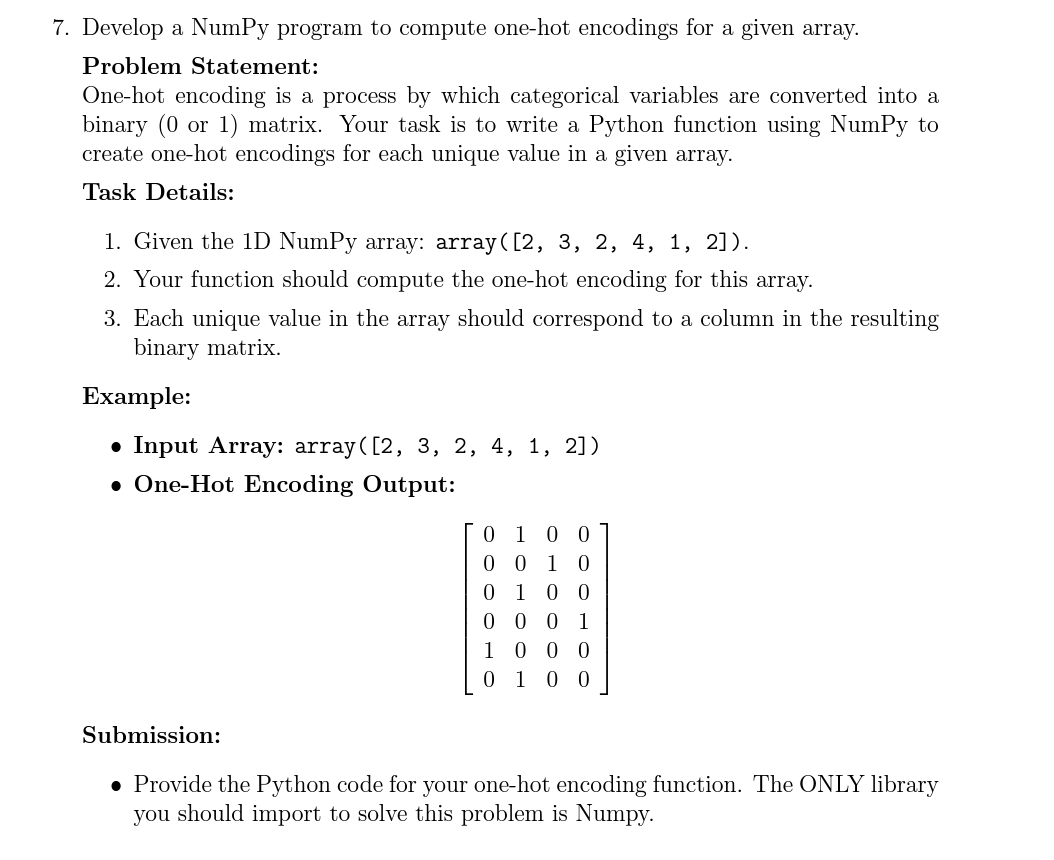

In [96]:
arr = np.array([2,3,2,4,1,2])

columns = len(np.unique(arr))
categories = np.unique(arr)

# Create a matrix full of zeros with rows as # of elements, and columns as # of unique elements
onehot = np.zeros((arr.shape[0],columns))

# Let's sort them just because we want answer to match above
categories_sorted = np.sort(categories)

for i in range(0,len(arr)):
    dindex = np.where(categories_sorted == arr[i])  # search each element in the sorted categories and get its index
    onehot[i,dindex[0]] = 1  # just change it to 1

In [97]:
onehot

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])